# Import libraries

In [1]:
import sys
sys.path.insert(0,'..')

In [2]:
import warnings
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] *2

/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Read the (clean) MP3 file

In [3]:
# Read Snapshot metadata
snapshot_context_path = Path("../data/RB_snapshot_context.csv")
snapshot_context_df = pd.read_csv(snapshot_context_path)
snapshot_context_df[['El. Position', 'Phys. Position']] = 0

# Read the (clean) MP3 file
mp3_fpa_df_path = Path("../data/RB_TC_extract_2022_07_07_processed_filled.csv")
mp3_fpa_df = pd.read_csv(mp3_fpa_df_path)
mp3_fpa_df = pd.concat([snapshot_context_df, mp3_fpa_df[mp3_fpa_df['timestamp_fgc'] >= 1526582397220000000]])
mp3_fpa_df_unique = mp3_fpa_df.drop_duplicates(subset=['fpa_identifier'])

len(mp3_fpa_df), len(mp3_fpa_df_unique)

(2992, 646)

In [4]:
mp3_fpa_df_unique['I_Q_kA'] = mp3_fpa_df_unique["I_Q_M"].apply(lambda x: np.round(x / 1e3)*1e3)
mp3_fpa_df_unique['dI_dt_from_data_round'] = mp3_fpa_df_unique["dI_dt_from_data"].apply(lambda x: int(np.round(x)))

mp3_fpa_df_unique['datetime'] = pd.to_datetime(mp3_fpa_df_unique['Date (FGC)'])
mp3_fpa_df_unique['year'] = mp3_fpa_df_unique['datetime'].apply(lambda x: x.year)
mp3_fpa_df_unique['month'] = mp3_fpa_df_unique['datetime'].apply(lambda x: x.month)
mp3_fpa_df_unique['day'] = mp3_fpa_df_unique['datetime'].apply(lambda x: x.day)

# Read metadata

In [5]:
metadata_path = Path("../data/RB_metadata.csv")
rb_magnet_metadata = pd.read_csv(metadata_path, index_col=False)
# python index starts at 0:
rb_magnet_metadata[['El. Position', 'Phys. Position']] = rb_magnet_metadata[['El. Position', 'Phys. Position']] - 1
rb_magnet_metadata

,Circuit,Magnet,Position,B1_aperture,Diode_type,Correctors,EE place,#Electric_EE,#Electric_circuit,Cryostat,...,age,Manufacturer,Inner cable type,Outer cable type,I_Q_SM18,Renamed short magnet ID,MTF Status,Magnet_construction_order,QPS Crate Number,Cryostat Number
0,RB.A12,MB.A8R1,276.7340,EXT,R,A,EVEN,1,78,LBARE.8R1,...,14.0,3.0,01B,02B8,11488.0,NaN,NaN,288,0,0
1,RB.A12,MB.B8R1,292.3940,EXT,R,B,ODD,77,77,LBBRF.8R1,...,14.0,2.0,01E,02C0,10622.0,NaN,NaN,256,0,1
2,RB.A12,MB.A9R1,315.7990,EXT,R,A,EVEN,2,79,LBARE.9R1,...,14.0,2.0,01E,02C9,12427.0,NaN,NaN,330,1,0
3,RB.A12,MB.B9R1,331.4590,EXT,R,B,ODD,76,76,LBBRG.9R1,...,14.0,2.0,01E,02C9,11155.0,NaN,NaN,319,2,1
4,RB.A12,MB.A10R1,356.2640,EXT,R,A,EVEN,3,80,LBARE.10R1,...,14.0,1.0,01E,02B8,11782.0,NaN,NaN,296,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,RB.A81,MB.A10L1,26302.6192,INT,L,B,ODD,75,75,LBBLG.10L1,...,14.0,3.0,01B,02G,12645.0,NaN,NaN,123,1,1
1228,RB.A81,MB.B9L1,26327.4242,INT,L,A,EVEN,2,79,LBALE.9L1,...,14.0,1.0,01B,02B5,12379.0,NaN,NaN,62,1,0
1229,RB.A81,MB.A9L1,26343.0842,INT,L,B,ODD,76,76,LBBLF.9L1,...,14.0,2.0,01B,02K,11757.0,NaN,NaN,61,2,1
1230,RB.A81,MB.B8L1,26366.4892,INT,L,A,EVEN,1,78,LBALE.8L1,...,14.0,3.0,01B,02G,11656.0,NaN,NaN,172,0,0


# Read masterfile MB_feature_analysis

In [6]:
master_file_path = Path("../data/analysis_conductor_fieldQuality_FPA2021_FTM2023_year2021_FPA2021_TFM2023.csv")
df_master_file = pd.read_csv(master_file_path, index_col=False)

empty_columns = df_master_file.columns[df_master_file.isnull().all()]
df_master_file = df_master_file.drop(columns = empty_columns)
df_master_file['Magnet'] = df_master_file.positions.apply(lambda x: 'MB.'+x)

# Load description of context variables

In [7]:
df_feature_context = pd.read_excel("../data/metadata_context_variables.xlsx", engine='openpyxl', index_col="Unnamed: 0")

# Load Data

In [8]:
df_comp = pd.read_csv("../data/final_components/cweights_trend.csv")

In [9]:
fpa_identifiers_fitted = np.unique(df_comp.index.values)
fpa_identifiers = mp3_fpa_df_unique.loc[mp3_fpa_df_unique.fpa_identifier.isin(fpa_identifiers_fitted), "fpa_identifier"].values    

len(fpa_identifiers_fitted), len(fpa_identifiers)

(215292, 0)

# Analyze subset

In [146]:
df = pd.read_csv('../data/correlation_tables/correlation_table.csv', index_col="Unnamed: 0")

In [147]:
df["El. Dist. to Quench Main"] = df["El. Dist. to Quench Main"] - 78
df["El. Dist. to Quench Mirror"] = df["El. Dist. to Quench Mirror"] - 77
df['Phys. Dist. to Quench'] = df['Phys. Dist. to Quench'] - 154

fpa_snapshots = snapshot_context_df.fpa_identifier.values
df.loc[df.fpa_identifier.isin(fpa_snapshots), "is_snapshot"] = 1
df.loc[~df.fpa_identifier.isin(fpa_snapshots), "is_snapshot"] = 0

df['dAC_abs'] = df['dAC'].apply(lambda x: np.abs(x))

my_columns = df_comp.drop(columns =['fpa_identifier','1EE']).columns

In [12]:
#df_subset3 = df[(df["no_sec_q"]==1) & (df["is_snapshot"]==0)].groupby("fpa_identifier")["3Hz_meas_log"].max()
#df_subset6 = df[(df["no_sec_q"]==1) & (df["is_snapshot"]==0)].groupby("fpa_identifier")["6Hz_meas_log"].max()

#fpa_EMP = df_subset3.index[(df_subset3>-1).values & (df_subset6>-1.4).values]
#df.loc[df.fpa_identifier.isin(fpa_snapshots), "is_snapshot"] = 1
#df.loc[~df.fpa_identifier.isin(fpa_snapshots), "is_snapshot"] = 0



# plot histograms

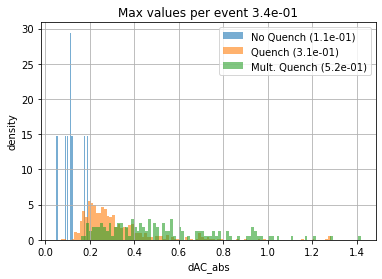

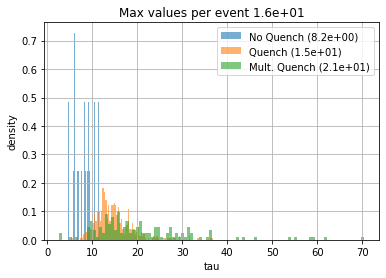

In [13]:
for column in ['dAC_abs', 'tau']:
    fig, ax = plt.subplots()
    
    df_no_q = df[(df["is_snapshot"]==1)].groupby("fpa_identifier")[column].max()
    df_q = df[(df["no_sec_q"]==1) & (df["is_snapshot"]==0)].groupby("fpa_identifier")[column].max()
    df_mult_q = df[(df["no_sec_q"]==0) & (df["is_snapshot"]==0)].groupby("fpa_identifier")[column].max()
    
    
    df_no_q.hist(ax=ax, bins=100, alpha=0.6, density =True, label=f"No Quench ({df_no_q.mean():.1e})")
    df_q.hist(ax=ax, bins=100, alpha=0.6, density =True, label=f"Quench ({df_q.mean():.1e})")
    df_mult_q.hist(ax=ax, bins=100, alpha=0.6, density =True, label=f"Mult. Quench ({df_mult_q.mean():.1e})")


    plt.title(f"Max values per event {df.groupby('fpa_identifier')[column].max().mean():.1e}")
    plt.legend()
    plt.ylabel("density")
    plt.xlabel(column)

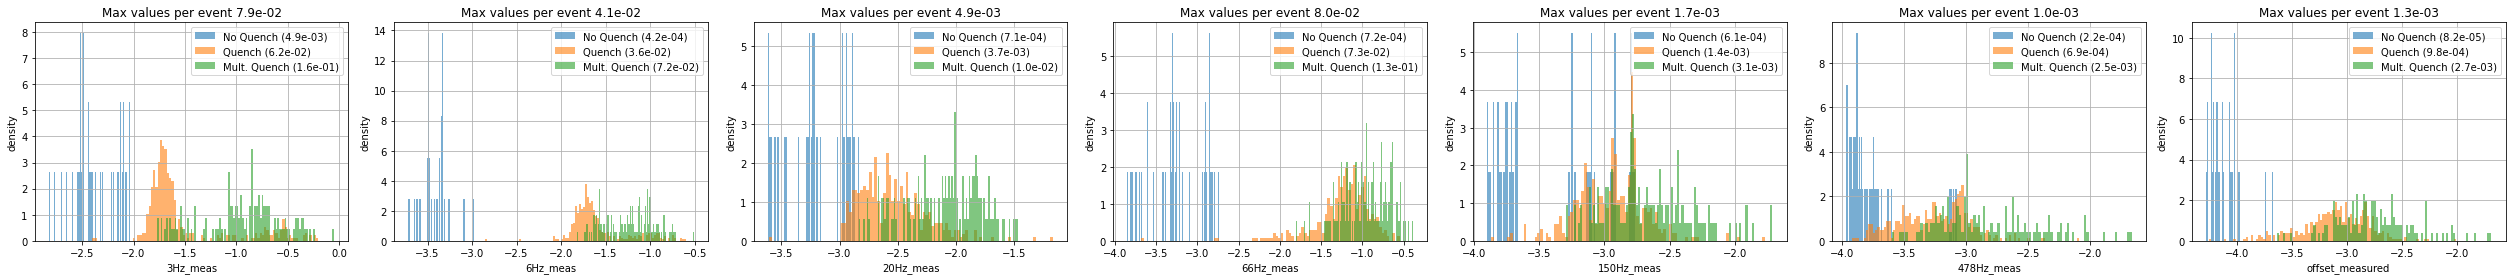

In [14]:
plot_columns = df_comp.filter(regex="meas(?!_)(?!ured_log)").columns
fig, axes = plt.subplots(1, len(plot_columns), figsize=(5*len(plot_columns),4))

for ax, column in zip(axes, plot_columns):

    df_no_q_log = df[(df["is_snapshot"]==1)].groupby("fpa_identifier")[column+"_log"].max()
    df_q_log  = df[(df["no_sec_q"]==1) & (df["is_snapshot"]==0)].groupby("fpa_identifier")[column+"_log"].max()
    df_mult_q_log  = df[(df["no_sec_q"]==0) & (df["is_snapshot"]==0)].groupby("fpa_identifier")[column+"_log"].max()
    
    df_no_q = df[(df["is_snapshot"]==1)].groupby("fpa_identifier")[column].max()
    df_q = df[(df["no_sec_q"]==1) & (df["is_snapshot"]==0)].groupby("fpa_identifier")[column].max()
    df_mult_q = df[(df["no_sec_q"]==0) & (df["is_snapshot"]==0)].groupby("fpa_identifier")[column].max()
    
    
    df_no_q_log.hist(ax=ax, bins=100, alpha=0.6, density =True, label=f"No Quench ({df_no_q.mean():.1e})")
    df_q_log.hist(ax=ax, bins=100, alpha=0.6, density =True, label=f"Quench ({df_q.mean():.1e})")
    df_mult_q_log.hist(ax=ax, bins=100, alpha=0.6, density =True, label=f"Mult. Quench ({df_mult_q.mean():.1e})")


    ax.set_title(f"Max values per event {df.groupby('fpa_identifier')[column].max().mean():.1e}")
    ax.legend()
    ax.set_ylabel("density")
    ax.set_xlabel(column)
plt.tight_layout()

# 478Hz

In [72]:
bool_basis = (df["no_sec_q"] == 1) & (df["Circuit_RB.A78"] == 1)  # &  (df["is_snapshot"]==1) & (df.dI_dt_from_data < 2) &  (df["2EE"]==1) 
df_to_corr = df[bool_basis]
#df_corr = df_to_corr.corr(method="spearman")
print(len(df_to_corr))

24480


(0.0, 0.0011)

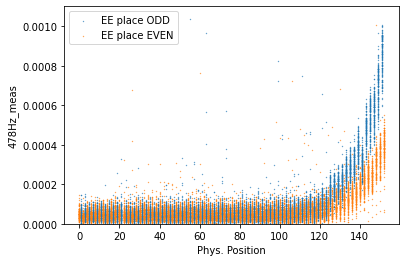

In [78]:
fig, ax = plt.subplots()
df_to_corr[df_to_corr['EE place_ODD']==1].plot.scatter(ax= ax, x="Phys. Position", y="478Hz_meas", s=0.1, c=default_colors[0], label='EE place ODD')
df_to_corr[df_to_corr['EE place_ODD']==0].plot.scatter(ax= ax, x="Phys. Position", y="478Hz_meas", s=0.1, c=default_colors[1], label='EE place EVEN')

plt.ylim((0,1.1e-3))

# 150 Hz

In [23]:
bool_basis = (df["no_sec_q"] == 1) & (df["El. Position"] < 78) & (df["QPS Crate Number_2"] == 1)  & (df["Circuit_RB.A81"] == 1) # | (df["Circuit_RB.A78"] == 1) | (df["Circuit_RB.A12"] == 1)| (df["Circuit_RB.A45"] == 1))   & (df["El. Position"] > 78) & (df["El. Position"] < 117) 
df_to_corr = df[bool_basis]
#df_corr = df_to_corr.corr(method="spearman")
#print(len(df_to_corr))

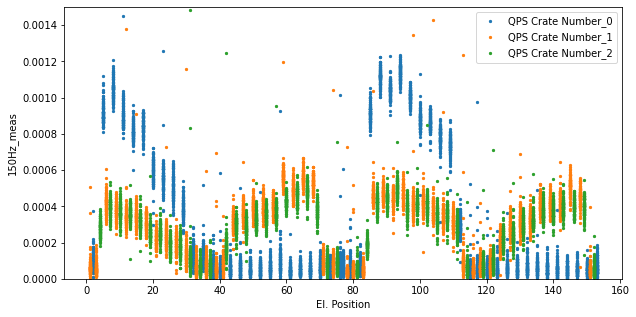

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
hue = ["QPS Crate Number_0","QPS Crate Number_1","QPS Crate Number_2"]

for i, m in enumerate(hue):
    df[(df[m]==1) & (df["Circuit_RB.A81"] == 1) & (df["no_sec_q"] == 1)  ].plot.scatter(ax=ax, x="El. Position", y="150Hz_meas", s=5, c=default_colors[i], alpha=1, label=m)

plt.ylim((0,0.0015))
plt.legend()

# 20 Hz

In [27]:
bool_basis =(snapshot_context_df.dI_dt_from_data > 2) & (snapshot_context_df.I_Q_M > 10500) 

fpa_basis = snapshot_context_df[bool_basis].fpa_identifier.values
print(len(fpa_basis))

df_to_corr = df[df.fpa_identifier.isin(fpa_basis) & (df["no_sec_q"] == 1)] #  & (df["El. Position"] < 117)
#df_corr = df_to_corr.corr(method="spearman") #method="spearman"
#print(len(df_to_corr))

8


<AxesSubplot:xlabel='El. Position', ylabel='20Hz_meas'>

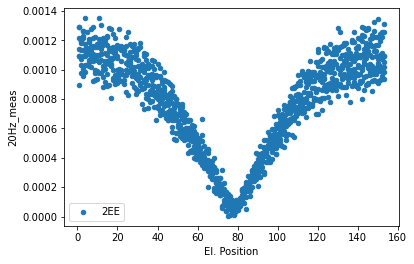

In [28]:
df_to_corr[(df["2EE"] == 1)].plot.scatter(x="El. Position", y="20Hz_meas", label="2EE")

<AxesSubplot:xlabel='El. Position', ylabel='20Hz_meas'>

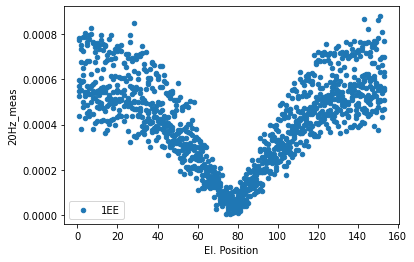

In [29]:
df_to_corr[(df["1EE"] == 1)].plot.scatter(x="El. Position", y="20Hz_meas", label="1EE")

# 20 Hz sec quench

In [79]:
fpa_sec_1EE = mp3_fpa_df[(mp3_fpa_df['Delta_t(iQPS-PIC)'] / 1000 > 0.2) & (mp3_fpa_df['Delta_t(iQPS-PIC)'] / 1000 < 0.5)].drop_duplicates(subset=['fpa_identifier']).fpa_identifier

df_to_corr = df[(df["1EE"] == 1)] 
df_to_corr.loc[df_to_corr.fpa_identifier.isin(fpa_sec_1EE), "D_open_1EE"] = 1
df_to_corr.loc[~df_to_corr.fpa_identifier.isin(fpa_sec_1EE), "D_open_1EE"] = 0

sum(df_to_corr.fpa_identifier.isin(fpa_sec_1EE)), sum(~df_to_corr.fpa_identifier.isin(fpa_sec_1EE))

(9792, 84609)

Text(0.5, 0, '20Hz_meas_log')

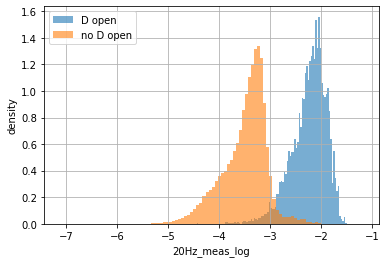

In [82]:
df_to_corr.loc[df_to_corr["D_open_1EE"]==1, "20Hz_meas_log"].hist(bins=100, alpha=0.6, density =True, label="D open")
df_to_corr.loc[df_to_corr["D_open_1EE"]==0, "20Hz_meas_log"].hist(bins=100, alpha=0.6, density =True, label="no D open")

plt.legend()
plt.ylabel("density")
plt.xlabel("20Hz_meas_log")
#plt.yscale("log")

<AxesSubplot:xlabel='El. Position', ylabel='20Hz_meas_log'>

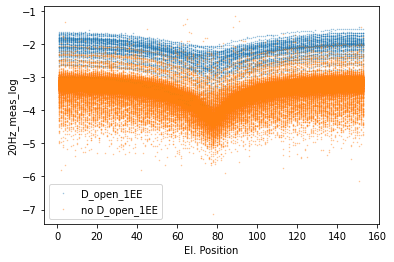

In [109]:
fig, ax = plt.subplots()
df_to_corr[(df_to_corr["D_open_1EE"] == 1)].plot.scatter(ax= ax,x="El. Position", y="20Hz_meas_log", label="D_open_1EE", s=0.2,c=default_colors[0], alpha=0.5)
df_to_corr[(df_to_corr["D_open_1EE"] == 0)].plot.scatter(ax= ax,x="El. Position", y="20Hz_meas_log", label="no D_open_1EE", s=0.2, c=default_colors[1], alpha=0.5)

Text(0.5, 0, '20Hz_meas_log')

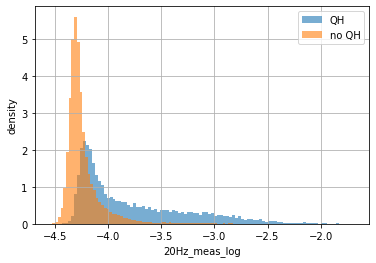

In [34]:
df_to_corr.loc[df_to_corr["D_open_1EE"]==1, "offset_measured_log"].hist(bins=100, alpha=0.6, density =True, label="QH")
df_to_corr.loc[df_to_corr["D_open_1EE"]==0, "offset_measured_log"].hist(bins=100, alpha=0.6, density =True, label="no QH")

plt.legend()
plt.ylabel("density")
plt.xlabel("20Hz_meas_log")
#plt.yscale("log")

# 6 Hz

In [35]:
fpa_snapshots = snapshot_context_df.fpa_identifier.values

df_to_corr = df[(df["1EE"] == 1)] #  & (df["El. Position"] < 117)

df_to_corr.loc[df_to_corr.fpa_identifier.isin(fpa_snapshots), "is_snapshot"] = 1
df_to_corr.loc[~df_to_corr.fpa_identifier.isin(fpa_snapshots), "is_snapshot"] = 0

#df_corr = df_to_corr.corr() #method="spearman"
print(len(df_to_corr))

94401


# 66 Hz

Text(0.5, 0, '66Hz_meas_log')

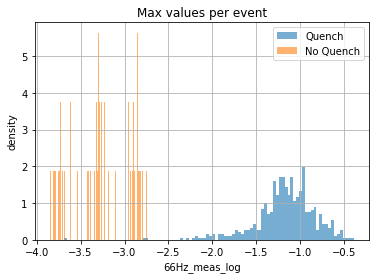

In [107]:
df_to_corr = df
df_to_corr[(df_to_corr["is_snapshot"]==0)].groupby("fpa_identifier")["66Hz_meas_log"].max().hist(bins=100, alpha=0.6, density =True, label="Quench")
df_to_corr[(df_to_corr["is_snapshot"]==1)].groupby("fpa_identifier")["66Hz_meas_log"].max().hist(bins=100, alpha=0.6, density =True, label="No Quench")

plt.title("Max values per event")
plt.legend()
plt.ylabel("density")
plt.xlabel("66Hz_meas_log")

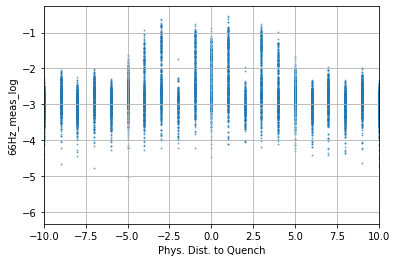

In [141]:
df[(df["no_sec_q"]==1) & (df["1EE"] == 1)].plot.scatter(x="Phys. Dist. to Quench", y="66Hz_meas_log", s=1, alpha=0.5)
plt.xlim((-10, 10))
plt.grid()

(-10.0, 10.0)

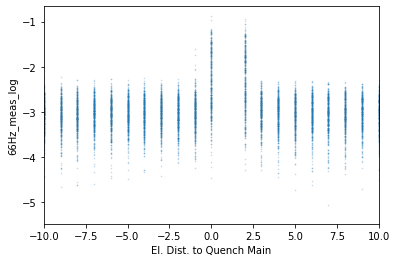

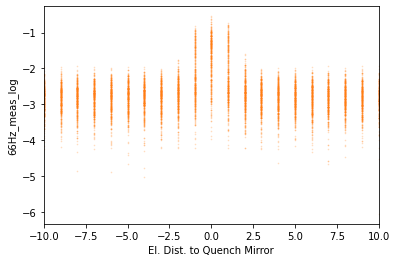

In [149]:
fig, ax = plt.subplots()
df[(df["no_sec_q"]==1) & (df["1EE"] == 1)].plot.scatter(ax= ax,x="El. Dist. to Quench Main", y="66Hz_meas_log", s=.5, alpha=0.2,c=default_colors[0])
plt.xlim((-10, 10))

fig, ax = plt.subplots()
df[(df["no_sec_q"]==1) & (df["1EE"] == 1)].plot.scatter(ax= ax,x="El. Dist. to Quench Mirror", y="66Hz_meas_log", s=.5, alpha=0.2,c=default_colors[1])
plt.xlim((-10, 10))

In [ ]:
bool_basis = (df["no_sec_q"] == 1) & (df["1EE"] = 1) & (df["QPS Crate Number_2"] == 1) 
df_to_corr = df[bool_basis]

# Exponential Trend values

<AxesSubplot:>

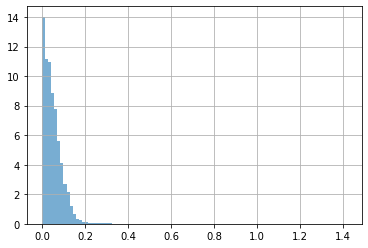

In [79]:
#df_q = df[(df["no_sec_q"]==1) & (df["is_snapshot"]==0)].groupby("fpa_identifier")["dAC_abs"].max()

df_q = df[(df["is_snapshot"]==0)]["dAC_abs"]

df_q.hist(bins=100, alpha=0.6, density =True, label=f"No Quench ({df_q.mean():.1e})")

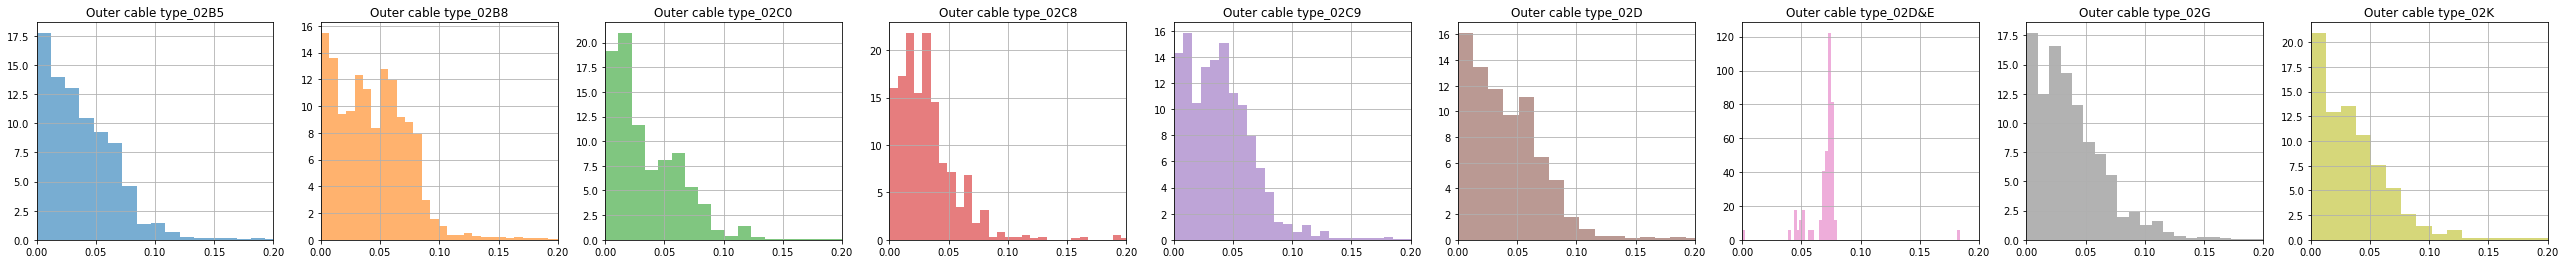

In [83]:
hue = ['Outer cable type_02B5',
       'Outer cable type_02B8', 'Outer cable type_02C0',
       'Outer cable type_02C8', 'Outer cable type_02C9',
       'Outer cable type_02D', 'Outer cable type_02D&E',
       'Outer cable type_02G', 'Outer cable type_02K']


fig, ax = plt.subplots(1, len(hue), figsize=(5*len(hue),4))
for i, m in enumerate(hue):
    df_to_corr = df[(df["is_snapshot"]==0) & (df["no_sec_q"]==1) & (df[m]==1) & (df["1EE"]==1) & (df.dI_dt_from_data > 2) & (df.I_Q_M > 10500)] #(df["is_snapshot"]==1) & 
    df_to_corr["dAC_abs"].hist(ax = ax[i], color=default_colors[i], bins=100, alpha=0.6, density =True)
    ax[i].set_xlim((0,0.2))
    ax[i].set_title(m)

In [64]:
df_corr.sort_values(by="dAC_abs", ascending=False)["dAC_abs"].head(30)

dAC_abs                                            1.000000
tau                                                0.814134
A                                                  0.266986
AVG_CAB_WIDTH_outer_ave                            0.234185
MIN_STR_IC_42_outer_ave                            0.228494
Cable_manufacturer_subgroup_outer_ave_02E0&02C0    0.226131
Cable_manufacturer_outer_ave_02C&02E               0.226131
b4_ave                                             0.225506
C_init                                             0.175424
Outer cable type_02C0                              0.171021
STACK_THICK_inner_ave                              0.166991
abs_max_UQS0_EE1_11kA                              0.161225
abs_max_UQS0_EE2_11kA_masked                       0.145384
is_long_unbalanced                                 0.140998
Num of splices                                     0.139646
abs_max_UQS0_EE1_11kA_masked                       0.138581
Correctors_B                            

# Other Correlations

In [ ]:
bool_basis =(snapshot_context_df.dI_dt_from_data > 5) & (snapshot_context_df.I_Q_M > 10500) 

fpa_basis = snapshot_context_df[bool_basis].fpa_identifier.values
df_to_corr = df[df.fpa_identifier.isin(fpa_basis) & (df["1EE"] == 1)] 
len(df_to_corr)

In [ ]:
frequency_columns = ['3Hz_meas', '6Hz_meas', '20Hz_meas', '66Hz_meas', '150Hz_meas', '478Hz_meas', 'offset_measured']
should_correlate = ["STR_DM_19_AVG_inner_ave", "STR_DM_19_AVG_outer_ave", "bs_surf_res_4K_bend_ave", "cps_resistivity_2K"]
ftm_columns = ["z_magnet_1Hz", 'z_magnet_10Hz', 'z_magnet_30Hz', 'z_magnet_100Hz', 'z_magnet_300Hz', 'z_magnet_1000Hz', 'z_magnet_3000Hz', 'z_magnet_10000Hz']

df_to_corr[frequency_columns + should_correlate + ftm_columns].corr().to_excel("corr.xlsx") #df_corr

# Partial Correlation

In [ ]:
import statsmodels.api as sm

df = sm.add_constant(df)  # adding a constant
model = sm.OLS(df['6Hz_meas_log'].fillna(0), df[['z_magnet_10Hz_q', 'I_Q_M']].fillna(0)).fit()

print('Partial correlation of X and Y controlling for Z is:', model.params['z_magnet_10Hz_q'])

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Let's assume you have a DataFrame like this
df = pd.DataFrame({
    'X': [1, 2, 3, 4, 5],
    'Y': [2, 3, 4, 5, 6],
    'Z': [5, 4, 3, 2, 1]
})

# We want to calculate the partial correlation of X on Y controlling for Z
# The formula for smf.ols is like 'Y ~ X + Z', meaning we want to explain Y with X and Z
model = smf.ols(formula='Y ~ X + Z', data=df).fit()

# Now the coefficient of X in the model is the partial correlation of X and Y controlling for Z
print(f"The partial correlation of X and Y controlling for Z is {model.params['Z']}")



# Look into c values in more detail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_log_hist(ax, W, bins = np.logspace(-4, -1, 100), **kwargs):
    
    ax.set_xscale('log')

    # Calculate logarithmic bin widths
    bin_widths = np.diff(bins)

    # Get histogram data without plotting
    hist_data, _ = np.histogram(W.flatten(), bins=bins)

    # Manually normalize histogram
    hist_data_normalized = hist_data / np.max(hist_data) #/ (np.sum(hist_data * bin_widths))

    # Plot manually normalized histogram using bar plot
    ax.bar(bins[:-1], hist_data_normalized, width=bin_widths, **kwargs)

In [ ]:
columns = ["3Hz","6Hz","20Hz","offset","150Hz","478Hz","66Hz","tau"]
for c in columns: 
    fig, ax = plt.subplots()
    plot_log_hist(ax, df[c].values)
    plt.title(c)
    plt.xlim((1e-4,1e-1))

# Look into correlations in more detail

In [ ]:
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] *2

In [ ]:
def plot_hist(mp3_fpa_df_unique, data_col, vary_columns):
    vary_values = mp3_fpa_df_unique[vary_columns].sort_values().unique()

    # Create a list to store data for each unique value
    data = [mp3_fpa_df_unique[mp3_fpa_df_unique[vary_columns] == value]["Circuit"] for value in vary_values]

    # Create labels for each unique value
    labels = [str(value) for value in vary_values]

    # Create a stacked histogram
    plt.hist(data, bins=mp3_fpa_df_unique[data_col].nunique(), stacked=True, label=labels)

    # Add legend
    plt.legend(title=vary_columns)


vary_columns = "Manufacturer" 
data_col= "Circuit"
plot_hist(mp3_fpa_df_unique, data_col, vary_columns)

In [ ]:
vary_columns = "Manufacturer" 
data_col= "Circuit"
plot_hist(rb_magnet_metadata, data_col, vary_columns)

# 3 Hz, 6Hz

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
manuf= ["Manufacturer_1.0_q", "Manufacturer_2.0_q", "Manufacturer_3.0_q"]

for i, m in enumerate(manuf):
    df[df[m]==1].plot.scatter(ax=ax, x="3Hz", y="6Hz", s=5, c=default_colors[i], alpha=0.5, label=m)
plt.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
hue = ["no_sec_q", "sec_q"]

for i, m in enumerate(hue):
    df[df[m]==1].plot.scatter(ax=ax, x="3Hz", y="tau", s=5, c=default_colors[i], alpha=0.5, label=m)
plt.legend()

# 20 Hz

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
hue = ['Circuit_RB.A12', 'Circuit_RB.A23', 'Circuit_RB.A34',
       'Circuit_RB.A45', 'Circuit_RB.A56', 'Circuit_RB.A67',
       'Circuit_RB.A78', 'Circuit_RB.A81']

df["Magnet_construction_order"] = df["Magnet_construction_order"].abs()

for i, m in enumerate(hue):
    df[df[m]==1].plot.scatter(ax=ax, x="Magnet_construction_order", y="20Hz", s=5, c=default_colors[i], alpha=0.2, label=m)

plt.legend()

# 66 Hz

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

df[(df.no_sec_q == 1)].groupby("Phys. Dist. to Quench").mean().plot(ax=ax, y="66Hz")
plt.legend()

# 150 Hz

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
manuf= ["Manufacturer_1.0_q", "Manufacturer_2.0_q", "Manufacturer_3.0_q"]

for i, m in enumerate(manuf):
    df[df[m]==1].plot.scatter(ax=ax, x="R_EE_odd", y="150Hz", s=5, c=default_colors[i], alpha=0.5, label=m)
plt.legend()
plt.yscale("log")

# Exp. Trend - A, C

In [ ]:

hue = ["Manufacturer_1.0", "Manufacturer_2.0", "Manufacturer_3.0"]

fig, ax = plt.subplots()
for i, m in enumerate(hue):
    
    plot_log_hist(ax, -df[df[m]==1].A.values, alpha =0.5, bins = np.logspace(-2, 5, 100))
    plt.yscale("log")

plt.xlabel("|A|")
plt.ylabel("Amplitude")
plt.legend(hue)

In [ ]:
hue = ["Manufacturer_1.0", "Manufacturer_2.0", "Manufacturer_3.0"]
fig, ax = plt.subplots()
for i, m in enumerate(hue):
    
    plot_log_hist(ax, df[(df[m]==1) & (df["no_sec_q"]==1) ].A.abs().values, alpha =0.5, bins = np.logspace(-2, 5, 100))
    plt.yscale("log")

plt.xlabel("|A|")
plt.ylabel("Amplitude")
plt.legend(hue)

# Exp. Trend - tau

In [ ]:
df.filter(regex="cable").columns.values

In [ ]:
hue = ['Outer cable type_02B5',
       'Outer cable type_02B8', 'Outer cable type_02C0',
       'Outer cable type_02C8', 'Outer cable type_02C9',
       'Outer cable type_02D', 'Outer cable type_02D&E',
       'Outer cable type_02G', 'Outer cable type_02K'] #df.filter(regex="ircuit").columns.values

fig, ax = plt.subplots(1, len(hue), figsize=(5*len(hue), 5))
for i, m in enumerate(hue):
    
    plot_log_hist(ax[i], df[(df[m]==1) & (df["no_sec_q"]==1) ].tau.abs().values, bins = np.logspace(-1, 2, 100), color=default_colors[i])
    plt.yscale("log")
    ax[i].set_title(m)

    ax[i].set_xlabel("|tau|")
    ax[i].set_ylabel("Amount")
    ax[i].grid()
plt.tight_layout()